**Unzip the file**

In [2]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/fer2013.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


**Import the Libraries**

In [3]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Initializing Training And Test Generators:**

In [4]:
TRAIN_DIR = 'train'
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = datagen.flow_from_directory(
    TRAIN_DIR, 
    target_size=(48,48),
    subset='training',
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(48,48),
    subset='validation',
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [5]:
test_data = 'test'

**Building the Convolutional Neural Network (CNN) Model**

In [13]:
_LABELS = ['angry', 'disgust', 'fear', 'happy',
           'sad', 'suprise', 'neutral']

In [10]:
from keras.layers import Input, Reshape, Dense, Dropout
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Activation, Flatten
from keras.layers import Input, Reshape, Dense, Dropout
from keras.layers import Conv2D, BatchNormalization
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [14]:
inputs = Input((48, 48))
reshaped_inputs = Reshape((48, 48, 1))(inputs)
conv1 = Conv2D(kernel_size=[5, 5], strides=1, filters=32,
                padding='same')(reshaped_inputs)
bn1 = BatchNormalization()(conv1)
conv1_2 = Conv2D(kernel_size=[5, 5], strides=1, filters=32,
                  padding='same')(bn1)
bn1_2 = BatchNormalization()(conv1_2)
act_1 = Activation('relu')(bn1_2)
pool1 = MaxPooling2D(pool_size=[2, 2], strides=2)(act_1)
dropout_1 = Dropout(rate=0.3)(pool1)

conv2 = Conv2D(kernel_size=[5, 5], strides=1, filters=64,
                padding='same')(dropout_1)
bn2 = BatchNormalization()(conv2)
conv2_2 = Conv2D(kernel_size=[5, 5], strides=1, filters=64,
                  padding='same')(bn2)
bn2_2 = BatchNormalization()(conv2_2)
act_2 = Activation('relu')(bn2_2)
pool2 = MaxPooling2D(pool_size=[2, 2], strides=2)(act_2)
dropout_2 = Dropout(rate=0.3)(pool2)

conv3 = Conv2D(kernel_size=[3, 3], strides=1, filters=128,
                padding='same')(dropout_2)
bn3 = BatchNormalization()(conv3)
conv3_2 = Conv2D(kernel_size=[3, 3], strides=1, filters=128,
                  padding='same')(bn3)
bn3_2 = BatchNormalization()(conv3_2)
act_3 = Activation('relu')(bn3_2)
pool3 = MaxPooling2D(pool_size=[2, 2], strides=2)(act_3)
dropout_3 = Dropout(rate=0.3)(pool3)

conv4 = Conv2D(kernel_size=[3, 3], strides=1, filters=128,
                padding='same')(dropout_3)
bn4 = BatchNormalization()(conv4)
conv4_2 = Conv2D(kernel_size=[3, 3], strides=1, filters=128,
                  padding='same')(bn4)
bn4_2 = BatchNormalization()(conv4_2)
act_4 = Activation('relu')(bn4_2)
pool4 = MaxPooling2D(pool_size=[2, 2], strides=2)(act_4)
dropout_4 = Dropout(rate=0.3)(pool4)

flatten = GlobalAveragePooling2D()(pool4)
dense = Dense(units=1024)(flatten)
logits = Dense(len(_LABELS), activation='softmax')(dense)

model = Model(inputs=inputs, outputs=logits)
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48)]          0         
                                                                 
 reshape_2 (Reshape)         (None, 48, 48, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 32)        832       
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 32)        25632     
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                            

**Compile the Model**

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

**Train the Model**

In [16]:
emotion_model_info = model.fit_generator(
        train_generator,
        epochs=100,
        validation_data=val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
359/359 [==============================] - 26s 32ms/step - loss: 1.7647 - accuracy: 0.2818 - val_loss: 2.2213 - val_accuracy: 0.2116
Epoch 2/100
359/359 [==============================] - 10s 28ms/step - loss: 1.5136 - accuracy: 0.4093 - val_loss: 1.5464 - val_accuracy: 0.4088
Epoch 3/100
359/359 [==============================] - 10s 28ms/step - loss: 1.3683 - accuracy: 0.4761 - val_loss: 1.3207 - val_accuracy: 0.5022
Epoch 4/100
359/359 [==============================] - 11s 30ms/step - loss: 1.2989 - accuracy: 0.4973 - val_loss: 1.3738 - val_accuracy: 0.4835
Epoch 5/100
359/359 [==============================] - 10s 28ms/step - loss: 1.2489 - accuracy: 0.5224 - val_loss: 1.2399 - val_accuracy: 0.5327
Epoch 6/100
359/359 [==============================] - 10s 28ms/step - loss: 1.2114 - accuracy: 0.5391 - val_loss: 1.2178 - val_accuracy: 0.5276
Epoch 7/100
359/359 [==============================] - 10s 28ms/step - loss: 1.1796 - accuracy: 0.5520 - val_loss: 1.1978 - val_ac

In [17]:

test_datagen = ImageDataGenerator(rescale=1./255) 
test_dataset = test_datagen.flow_from_directory(test_data,target_size=(48,48),color_mode="grayscale",
    class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [18]:
test_hist = model.evaluate(test_dataset)

225/225 [==============================] - 5s 21ms/step - loss: 1.4095 - accuracy: 0.6330


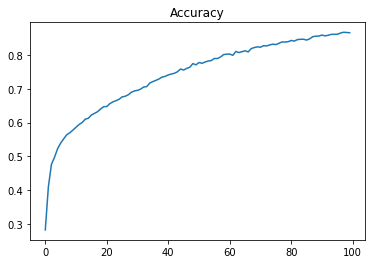

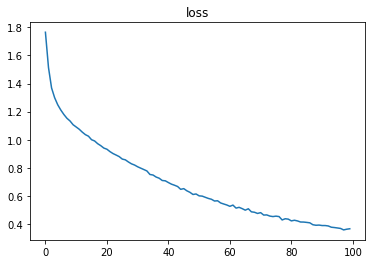

In [19]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(emotion_model_info.history['accuracy'])
plt.show()
plt.title('loss')
plt.plot(emotion_model_info.history['loss'])
plt.show()

In [20]:
model.save('model.h58')

INFO:tensorflow:Assets written to: model.h58/assets


In [ ]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [21]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

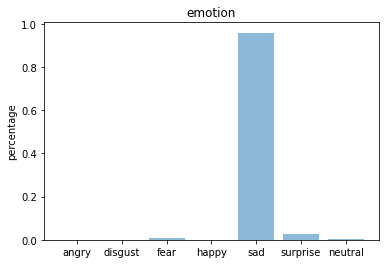

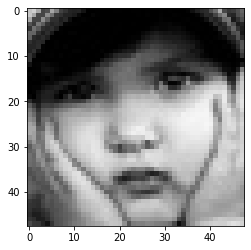

In [23]:
import cv2

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/test/fear/PrivateTest_1540303.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x =x/ 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import seaborn as sn

In [25]:
def performance_metrics(model, test):
    y_pred = model.predict(test)
    y_result = []
    for p in y_pred:
        y_result.append(np.argmax(p))
    
    y_actual = []
    for i in range(len(test)):
        for p in test[i][1]:
            y_actual.append(np.argmax(p))
    
    print(classification_report(y_actual, y_result))
    
    cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

    plt.figure(figsize = (10, 7))
    sn.heatmap(cm, annot = True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

              precision    recall  f1-score   support

           0       0.14      0.15      0.15       958
           1       0.02      0.03      0.02       111
           2       0.15      0.14      0.14      1024
           3       0.26      0.26      0.26      1774
           4       0.18      0.19      0.18      1233
           5       0.16      0.14      0.15      1247
           6       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.18      0.18      0.18      7178



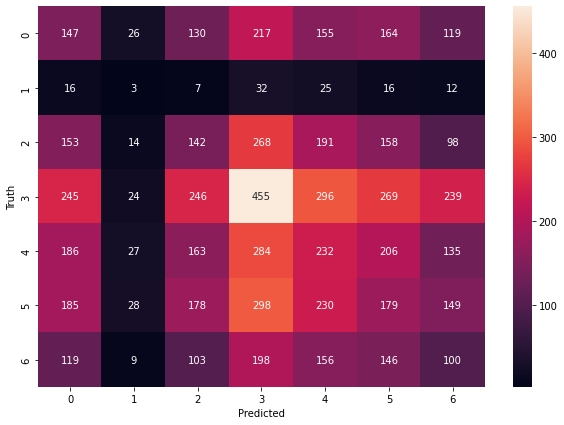

In [27]:
performance_metrics(model, test_dataset)